## Pump-it-Up-Data-Mining-the-Water-Table-Tanzania-Well-Water-Project

In [1]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #
import seaborn as sns  #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Loading the Train and Test Sets

train = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')
test  = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
label  = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
full_data = [train, test, label]
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [22]:
train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [21]:
label.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


In [52]:
print('This dataset contains ',train.shape[0],'rows')
print('This dataset contains ',train.shape[1],'columns')

('This dataset contains ', 59400, 'rows')
('This dataset contains ', 40, 'columns')


### Joining the Training Features Dataset with the Label Dataset on Column ID into one  Training Dataframe


In [23]:
df = train.merge(label, on="id")
df.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
1339,61508,0.0,2011-03-04,Is,449,Is,37.135387,-6.781456,Hospital,0,...,soft,good,unknown,unknown,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
1135,30098,0.0,2013-01-12,NaN,1601,NaN,34.876735,-4.682014,Kisimani,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
53414,23506,0.0,2012-11-03,Mdgwc,1286,DWE,33.944296,-1.976393,Chuoni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,non functional
57717,49302,0.0,2013-04-04,Kilwater,777,Kilwater,37.575513,-3.414640,Kwa Haji,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
39674,62296,0.0,2013-01-31,Sabodo,18,Sabodo,39.669392,-9.557978,Kwa Mh. Issa Nassor,0,...,unknown,unknown,unknown,unknown,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


## Quick Visualization of the Target Variable: Status Group

In [48]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

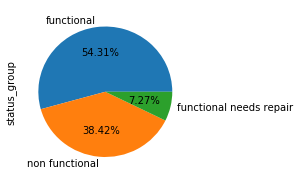

In [24]:
# Quick Visualization of The Target Variable

plt.figure(figsize=(3,3))
pd.Series(df['status_group']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

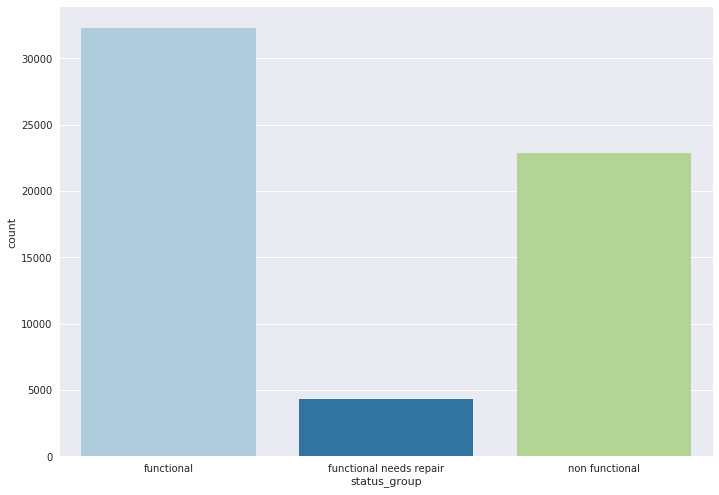

In [49]:

sns.countplot(data=df, x="status_group", palette="Paired")

In [57]:

labels_count = df.status_group.value_counts()
total_labels = df.status_group.count()
(labels_count/total_labels)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

,Total,Percent
scheme_name,28166,0.474175
scheme_management,3877,0.065269
installer,3655,0.061532
funder,3635,0.061195
public_meeting,3334,0.056128


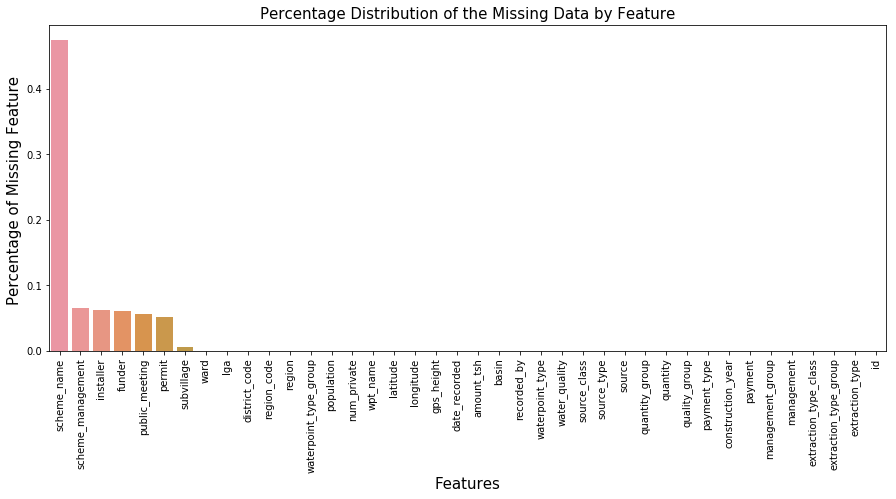

In [12]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Missing Feature ', fontsize=15)
plt.title('Percentage Distribution of the Missing Data by Feature', fontsize=15)
missing_data.head()

There are null-values present in the following features:

funder (object)

installer (object)

subvillage (object)

public_meeting (object)

scheme_management (object)

scheme_name (object)

permit (object)


In [54]:
# pct of cells with missing values out of all cells
total_cells = np.product(df.shape)
total_missing_values = df.isnull().sum().sum()
pct_missing = (total_missing_values / total_cells * 100)
print("Percentage of cells with null-values: {0:.1f}%".format(pct_missing))

Percentage of cells with null-values: 0.0%


In [143]:
# Checking the missing values

missing_df =train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(train.shape[0]-missing_df['Missing Values Count'])/train.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,scheme_name,28166,52.582492
1,scheme_management,3877,93.473064
2,installer,3655,93.846801
3,funder,3635,93.880471
4,public_meeting,3334,94.387205
5,permit,3056,94.855219
6,subvillage,371,99.375421
7,quantity,0,100.000000
8,quality_group,0,100.000000
9,water_quality,0,100.000000


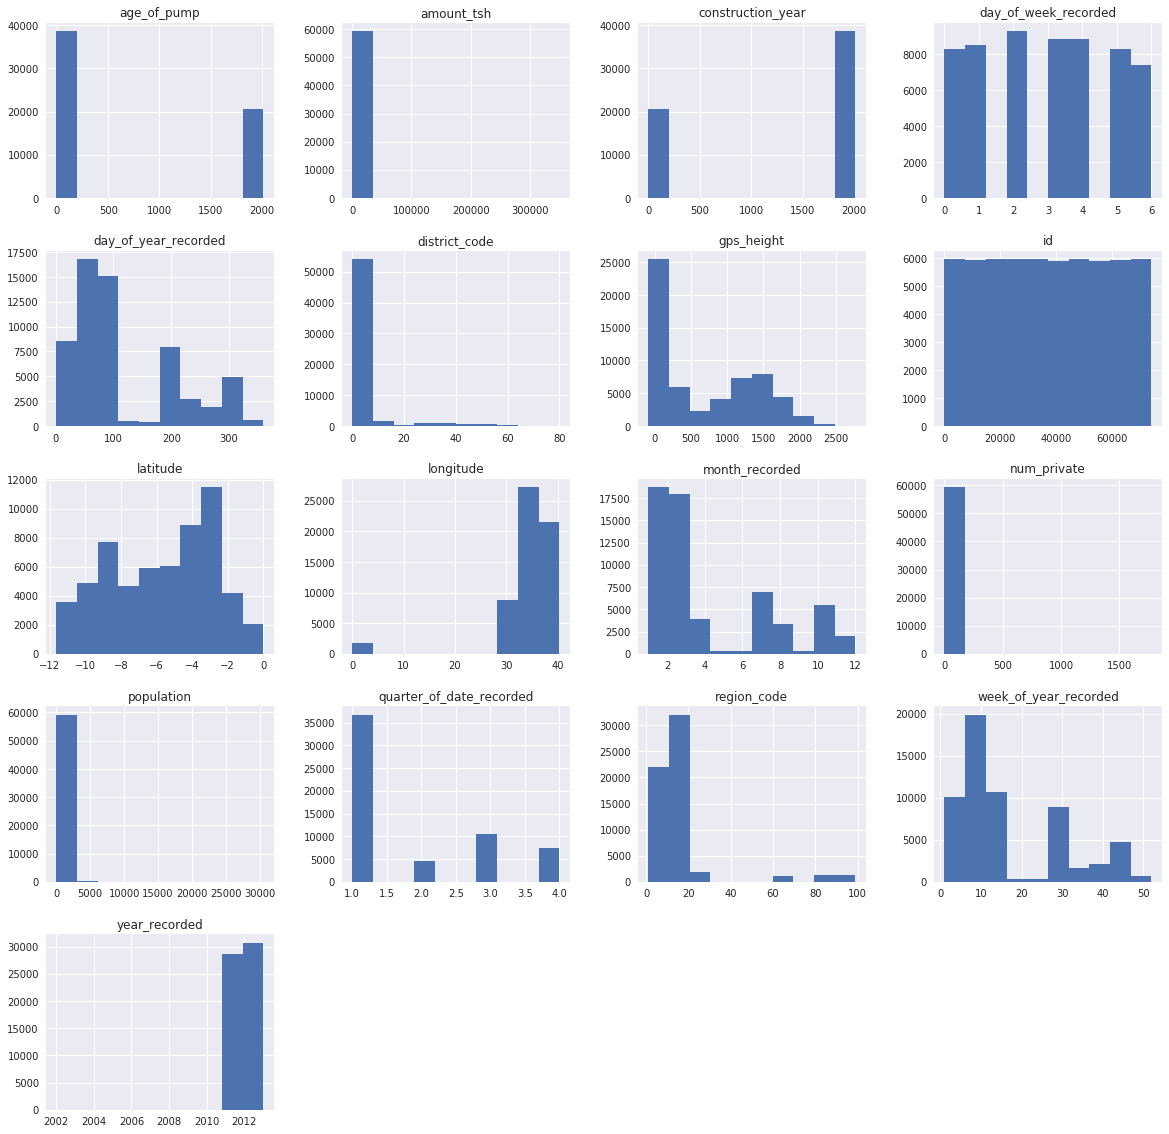

In [51]:
# Plotting the Histogram for each variable

df.hist(figsize = (20, 20))
plt.show()

## Data Transformation and Engineering 

In [58]:

# Changing dtypes to floats instead of int64
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [34]:
# Convert target feature into categorical to speed up training of the ML models
df['status_group'] = df['status_group'].astype('category')

In [37]:
# Convert date_recorded into a datetime object for further engineering
df['date_recorded'] = pd.to_datetime(df['date_recorded'], infer_datetime_format=True, errors='ignore')

### Exploring the Latitude and Longitude Columns

Latitude values range from -11.64944018 to -2e-08.


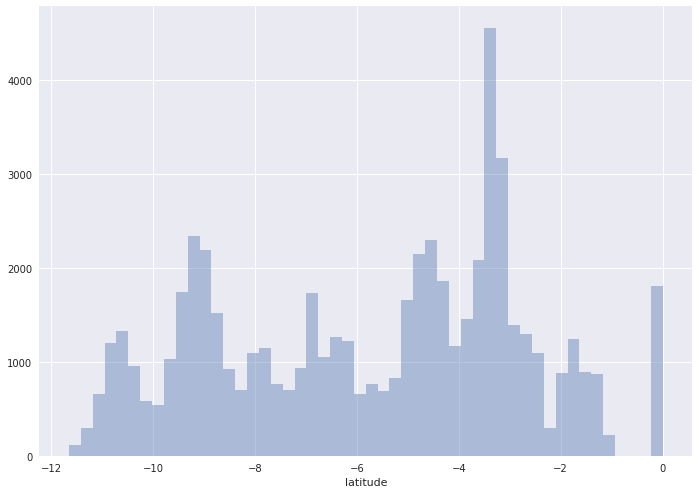

In [43]:
print("Latitude values range from {} to {}.".format(df.latitude.min(), df.latitude.max()))
sns.distplot(df.latitude, kde=False, bins=50, label="Distribution of waterpoints by Latitude")

Longitude values range from 0.0 to 40.34519307.


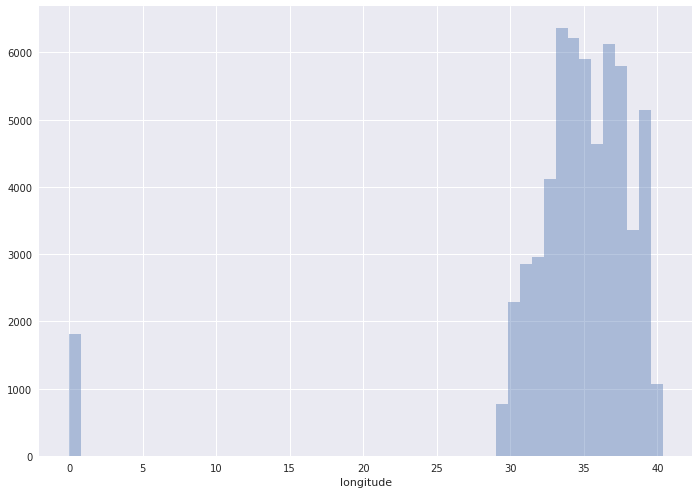

In [44]:
print("Longitude values range from {} to {}.".format(df.longitude.min(), df.longitude.max()))
sns.distplot(df.longitude, kde=False, bins=50, label="Distribution of waterpoints by Longitude")

## Feature Engineering

### Decoding the Date Time Column

In [39]:

# Creating new features from the date_recorded feature representing the date the row was entered into the dataset.

df['year_recorded'] = df['date_recorded'].dt.year
df['month_recorded'] = df['date_recorded'].dt.month 
df['week_of_year_recorded'] = df['date_recorded'].dt.weekofyear
df['day_of_week_recorded'] = df['date_recorded'].dt.dayofweek
df['day_of_year_recorded'] = df['date_recorded'].dt.dayofyear
df['quarter_of_date_recorded'] = df['date_recorded'].dt.quarter


# Transform "construction_year" dtype into int to do operations so we can calculate the years difference 
# from when a waterpoint was constructed and when it was last checked.
df['construction_year'] = df['construction_year'].astype("int64")
df['age_of_pump'] = df['year_recorded'].values - df['construction_year'].values

# Sanity checking the new features compared to date_recorded
df[['date_recorded',
    'construction_year',
    'year_recorded',  
    'age_of_pump',
    'month_recorded',
    'week_of_year_recorded',
    'day_of_week_recorded',
    'day_of_year_recorded',
    'quarter_of_date_recorded'
   ]].head(10)

,date_recorded,construction_year,year_recorded,age_of_pump,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded
0,2011-03-14,1999,2011,12,3,11,0,73,1
1,2013-03-06,2010,2013,3,3,10,2,65,1
2,2013-02-25,2009,2013,4,2,9,0,56,1
3,2013-01-28,1986,2013,27,1,5,0,28,1
4,2011-07-13,0,2011,2011,7,28,2,194,3
5,2011-03-13,2009,2011,2,3,10,6,72,1
6,2012-10-01,0,2012,2012,10,40,0,275,4
7,2012-10-09,0,2012,2012,10,41,1,283,4
8,2012-11-03,0,2012,2012,11,44,5,308,4
9,2011-08-03,0,2011,2011,8,31,2,215,3


In [41]:
df[['date_recorded',
    'year_recorded', 
    'construction_year', 
    'age_of_pump',
    'month_recorded', 
    'week_of_year_recorded',
    'day_of_week_recorded',
    'day_of_year_recorded',
    'quarter_of_date_recorded'
   ]].dtypes

date_recorded               datetime64[ns]
year_recorded                        int64
construction_year                    int64
age_of_pump                          int64
month_recorded                       int64
week_of_year_recorded                int64
day_of_week_recorded                 int64
day_of_year_recorded                 int64
quarter_of_date_recorded             int64
dtype: object

All the new features created off of date_recorded pass the sanity checks and all share the int64 data type. This is important as they are now numerical values required for most machine learning models.

In [42]:
# Dropping date_recorded as we have engineered new features based on it.

df.drop('date_recorded',axis=1, inplace=True, errors='ignore')
df.head(3)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,communal standpipe,communal standpipe,functional,2011,3,11,0,73,1,12
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,communal standpipe,communal standpipe,functional,2013,3,10,2,65,1,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,communal standpipe multiple,communal standpipe,functional,2013,2,9,0,56,1,4


In [ ]:
from sklearn.preprocessing import LabelEncoder


## Exploratory Data Analysis

In [56]:
print("Public_meeting contains {} unique entities evaluating to either True/False or null-value.".format(len(df.public_meeting.unique())))
print("\nCount of each public_meeting in the dataset:\n{}".format(df.public_meeting.value_counts()))

Public_meeting contains 3 unique entities evaluating to either True/False or null-value.

Count of each public_meeting in the dataset:
True     51011
False     5055
Name: public_meeting, dtype: int64


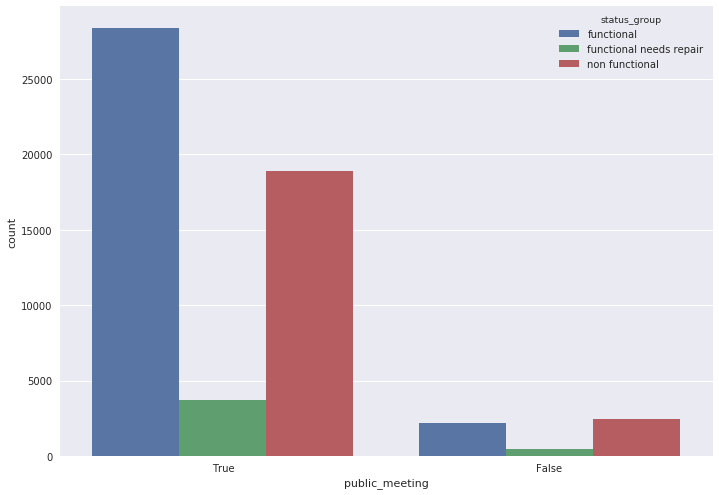

In [55]:
sns.countplot(data=df, x='public_meeting', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

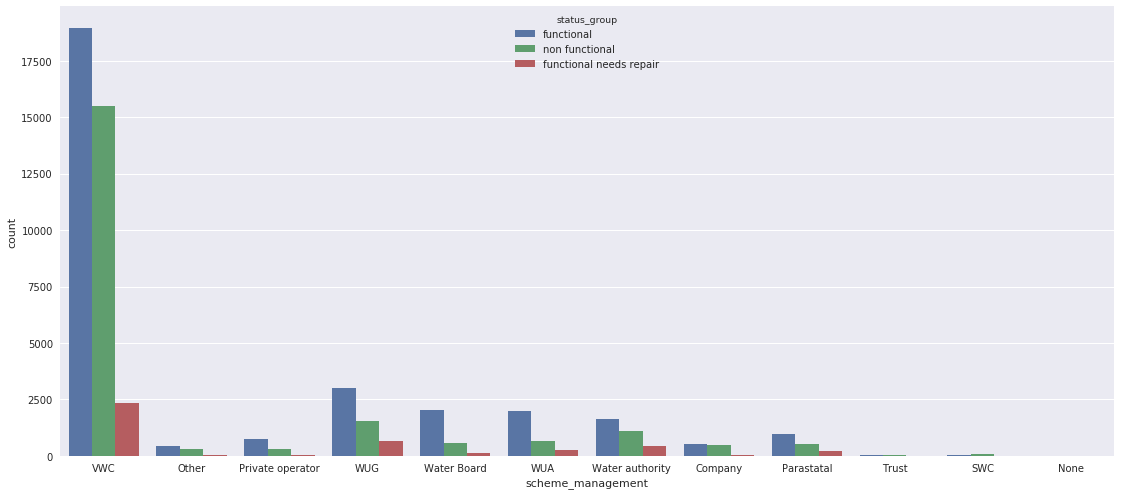

In [31]:

sns.countplot(data=df, x='scheme_management', hue='status_group')
sns.set(rc={'figure.figsize':(18.9,9.27)})

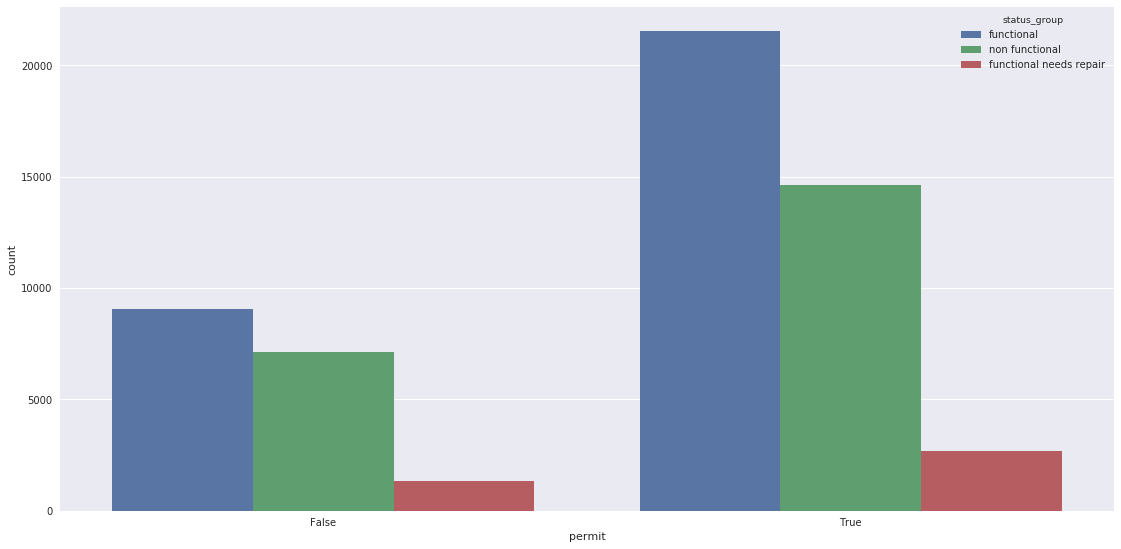

In [32]:
sns.countplot(data=df, x='permit', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [59]:
df.head(3)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,communal standpipe,communal standpipe,functional,2011,3,11,0,73,1,12
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,communal standpipe,communal standpipe,functional,2013,3,10,2,65,1,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,communal standpipe multiple,communal standpipe,functional,2013,2,9,0,56,1,4


## How to convert latitude / longtitude Columns in CSV to Geometry Column using Python


### Leveraging the Geopandas GeodataFrame to create a a Geometry Column Dataframe



In [141]:
# importing libraries

import geopandas as gpd  # To create GeodataFrame
from shapely.geometry import Point, Polygon  # Shapely for converting latitude/longtitude to geometry
%matplotlib inline
import pandas as pd # Reading csv file 


In [90]:
# creating a geometry column 

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [91]:
df['geometry'] = geometry

In [ ]:
# Drop the latitude and longitude columns

df.drop(['latitude','longitude'], axis = 1, inplace=True)

#### Drop the Latitude and Longitude Columns

In [ ]:
df.drop(['Latitude','Longitude'], axis = 1, inplace=True)

In [97]:
crs = {'init': 'epsg:4326'}
df_locs = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [99]:
df_locs.head(2)


,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,waterpoint_type_group,status_group,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump,geometry
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,communal standpipe,functional,2011,3,11,0,73,1,12,POINT (34.93809 -9.85632)
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,communal standpipe,functional,2013,3,10,2,65,1,3,POINT (34.69877 -2.14747)


### Reading the Tanzania Places  Full ShapeFile Full Dataset

In [115]:
# Read in the data
full_data = gpd.read_file("places.shp")

# View the first five rows of the data
full_data.head()

,osm_id,name,type,population,geometry
0,27251888,Nungwi,town,NaN,POINT (39.29922 -5.72635)
1,27251889,Kilindi,village,NaN,POINT (39.28754 -5.87489)
2,27251989,Mahonda,town,NaN,POINT (39.24995 -5.98834)
3,27252328,Bububu,village,NaN,POINT (39.23334 -6.09252)
4,27252361,Stone Town,city,NaN,POINT (39.19330 -6.16344)


In [116]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [117]:
data = full_data.loc[:, ["osm_id", "name","type","geometry"]].copy()

In [118]:
data.head(3)

,osm_id,name,type,geometry
0,27251888,Nungwi,town,POINT (39.29922 -5.72635)
1,27251889,Kilindi,village,POINT (39.28754 -5.87489)
2,27251989,Mahonda,town,POINT (39.24995 -5.98834)


In [119]:
data.name.value_counts()

village         4
Ziwani          3
Kisaki          3
Majengo         3
Kasanga         3
Kisesa          2
Mutukula        2
Mitole          2
Mkuyuni         2
Mtanza          2
Kikagati        2
Kilosa          2
Kashule         2
Katoro          2
Magamba         2
Manga           2
Mtanga          2
Kongwa          2
Nanganga        2
Kalenga         2
Namanga         2
Gihofi          2
Chala           2
Malindi         2
Kikongo         2
Kimamba         2
Kibaya          2
Mahenge         2
Maweni          2
Itete           2
               ..
Michenga        1
Usimbe          1
Robanda         1
Rungwa          1
Marumba         1
Lundamatwe      1
Chalinze        1
Rujewa          1
Lukisi          1
Namikupa        1
Njuga           1
Mwetemo         1
Bugene          1
Mwanhuzi        1
Makumira        1
Mbawala         1
Tanangozi       1
Kiweri          1
Luponde         1
Mkoko           1
Suye            1
Nangoo          1
Bwagura         1
Njinjo          1
Mtandika '

In [108]:
street_map = gpd.read_file("places.shp")

In [150]:
df.head(3)

,id,amount_tsh,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,...,waterpoint_type_group,status_group,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump,geometry
0,69572,6000.0,Roman,1390,Roman,none,0,Lake Nyasa,Mnyusi B,Iringa,...,communal standpipe,functional,2011,3,11,0,73,1,12,POINT (34.93809 -9.85632)
1,8776,0.0,Grumeti,1399,GRUMETI,Zahanati,0,Lake Victoria,Nyamara,Mara,...,communal standpipe,functional,2013,3,10,2,65,1,3,POINT (34.69877 -2.14747)
2,34310,25.0,Lottery Club,686,World vision,Kwa Mahundi,0,Pangani,Majengo,Manyara,...,communal standpipe,functional,2013,2,9,0,56,1,4,POINT (37.46066 -3.82133)


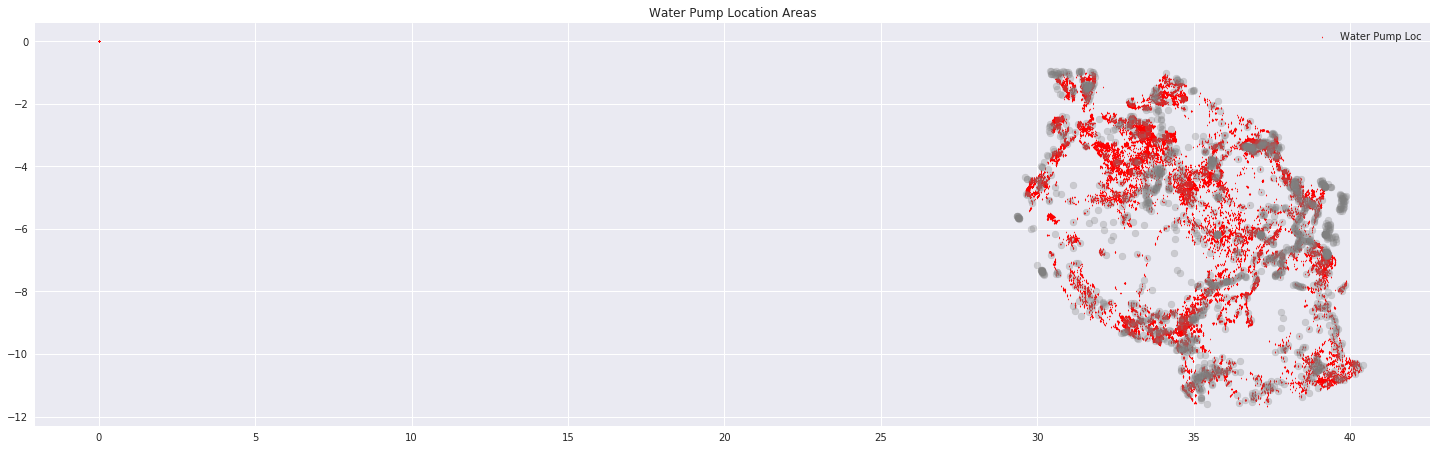

In [154]:
fig, ax = plt.subplots(figsize = (25,20))
df_locs.geometry.plot(marker='d',color='red', markersize=1, ax=ax, label = 'Water Pump Loc')
street_map.plot(color='grey', ax=ax, alpha = 0.3)

plt.title('Water Pump Location Areas')
plt.legend()

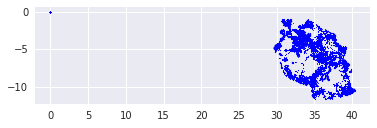

In [148]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5)

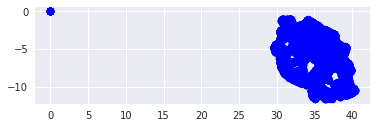

In [139]:
# We can now plot our ``GeoDataFrame``.
gdf.plot(color='blue')

plt.show()

In [156]:
df_locs.head(3)

,id,amount_tsh,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,...,waterpoint_type_group,status_group,year_recorded,month_recorded,week_of_year_recorded,day_of_week_recorded,day_of_year_recorded,quarter_of_date_recorded,age_of_pump,geometry
0,69572,6000.0,Roman,1390,Roman,none,0,Lake Nyasa,Mnyusi B,Iringa,...,communal standpipe,functional,2011,3,11,0,73,1,12,POINT (34.93809 -9.85632)
1,8776,0.0,Grumeti,1399,GRUMETI,Zahanati,0,Lake Victoria,Nyamara,Mara,...,communal standpipe,functional,2013,3,10,2,65,1,3,POINT (34.69877 -2.14747)
2,34310,25.0,Lottery Club,686,World vision,Kwa Mahundi,0,Pangani,Majengo,Manyara,...,communal standpipe,functional,2013,2,9,0,56,1,4,POINT (37.46066 -3.82133)


## Saving the Dataset for Further Modelling, Exploration and Visualization

In [157]:
#export data to csv
df_locs.to_csv("DatasetModel.csv", index=False)